# Importing Library

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Using Tensorflow Keras instead of the original Keras

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2021-11-22 06:52:12.426902: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# Loading Dataset from Tensorflow

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape 

(10000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
ytest.shape 

(10000,)

# Visualizing 

Image:

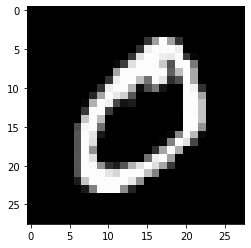

In [7]:
plt.imshow(xtrain[1,:,:],cmap='gray')

Label:

In [8]:
ytrain[1]

0

Image:

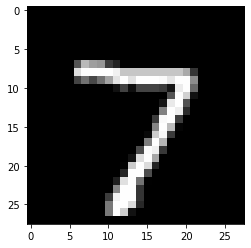

In [9]:
plt.imshow(xtest[0,:,:],cmap='gray')

label:

In [10]:
ytest[0]

7

In [11]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [12]:
#Represent Training & Testing samples suitable for #tensorflow backend

x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')

In [13]:
x_test.shape

(10000, 784)

In [14]:
x_train/=255
x_test/=255

In [15]:
y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

### Biulding Model

In [16]:
model = Sequential()

2021-11-22 06:52:18.294635: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-22 06:52:18.297856: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-22 06:52:18.345577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 06:52:18.346203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-11-22 06:52:18.346267: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-22 06:52:18.373636: I tensorflow/stream_executor/platform/def

In [17]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history=model.fit(x_train, y_train, epochs=100, batch_size=256, verbose=1)

2021-11-22 06:52:20.788799: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-22 06:52:20.800268: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000170000 Hz


Epoch 1/100


2021-11-22 06:52:21.231984: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 41/235 [====>.........................] - ETA: 0s - loss: 1.1083 - accuracy: 0.6926

2021-11-22 06:52:22.010467: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


235/235 [==============================] - 2s 2ms/step - loss: 0.5074 - accuracy: 0.8585
Epoch 2/100
235/235 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9690
Epoch 3/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9805
Epoch 4/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9893
Epoch 5/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9923
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.9947
Epoch 7/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 0.9964
Epoch 8/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9963
Epoch 9/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 10/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9963
E

In [20]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.984
Loss: 0.126


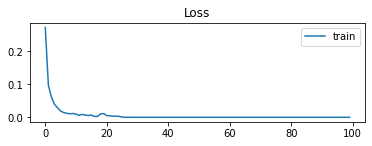

In [21]:
from numpy import where
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

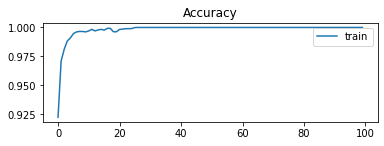

In [22]:
%matplotlib inline
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()

In [23]:
y_predict = model.predict(x_test)

In [24]:
y_predict[0]

array([1.8884732e-23, 1.5335185e-26, 4.6117242e-24, 5.4063946e-18,
       8.5488997e-28, 2.4073873e-26, 2.0261570e-33, 1.0000000e+00,
       2.1190576e-25, 9.1365894e-24], dtype=float32)

In [25]:
np.argmax(y_predict[0])

7

###  Creating Confusion Matrix

In [26]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 975    1    1    0    0    0    1    0    1    1]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   2    1 1016    3    1    0    0    4    4    1]
 [   0    0    1  997    0    1    0    2    3    6]
 [   1    1    3    0  964    0    3    1    1    8]
 [   2    0    0    8    1  874    4    0    2    1]
 [   4    2    2    1    3    4  942    0    0    0]
 [   2    3    7    0    2    0    0 1007    3    4]
 [   3    0    2    4    3    2    2    2  952    4]
 [   2    2    0    2    6    2    1    1    2  991]]


## Creating Classification Report

In [27]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

